<font size=7> Tiling Components Analysis

# <font color="grey">Setup

In [3]:
from human_hip import spike_data
import numpy as np
import matplotlib.pyplot as plt
from human_hip.spike_data import correlation_matrix, eigenvalues_eigenvectors, plot_eigenvectors #firing_rates,


# HC112823

In [4]:
sd = spike_data.read_autocurated_data( "/workspaces/human_hippocampus/data/ephys/2023-12-03-e-Hc112823_avv9hckcr1/derived/kilosort2/Hc112823_avv9hckcr1_21841_120323_3_acqm.zip" )


(-1.0, 60.0)

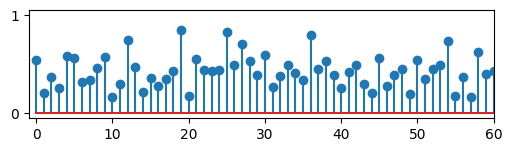

In [5]:

sttc_matrix = sd.spike_time_tilings()
sttc_eigenvalues, sttc_eigenvectors = eigenvalues_eigenvectors(sttc_matrix)
x = sttc_eigenvectors[:,0]
x_normalized = (x - np.min(x)) / (np.max(x) - np.min(x))

plt.figure(figsize=(6,1.4)) 
plt.stem( x_normalized )
plt.yticks([0, 1])
plt.xlim(-1, 60)

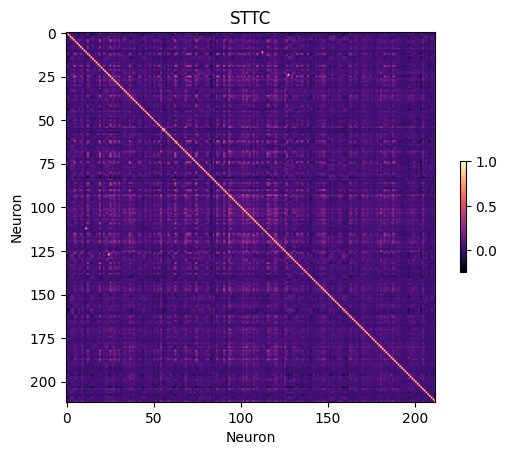

In [6]:
spike_data.plot_sttc_matrix( sd ) 

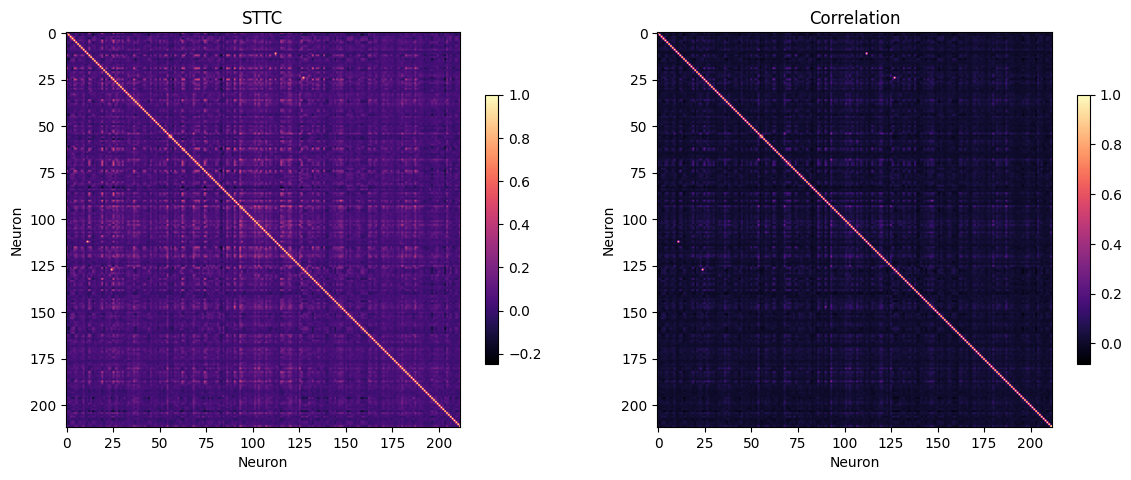

In [7]:
spike_data.plot_matrices_connectivity( sd )

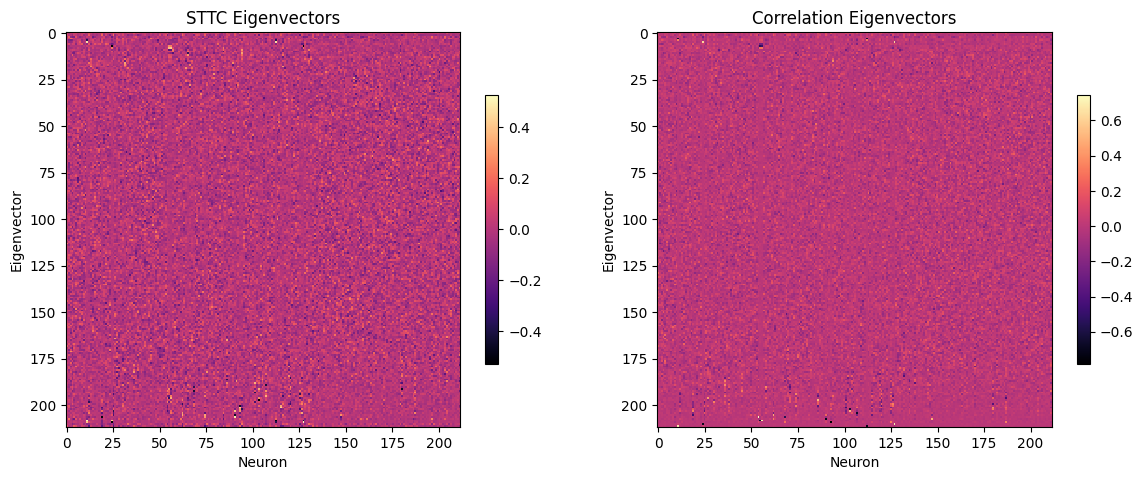

In [8]:
spike_data.plot_eigenvector_matrix(sd )

(0.0, 50.0)

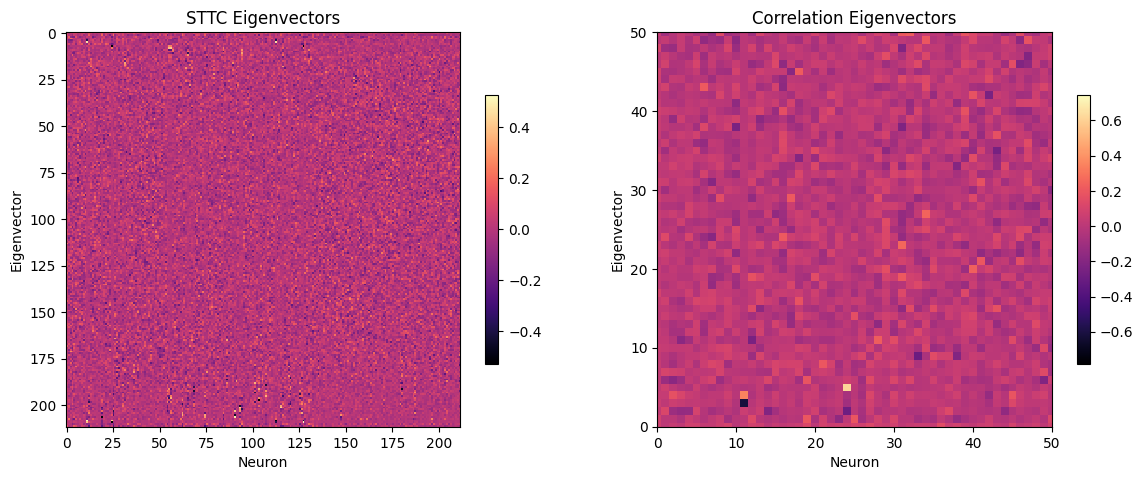

In [9]:
spike_data.plot_eigenvector_matrix(sd )

plt.xlim(0,50)
plt.ylim(0,50)

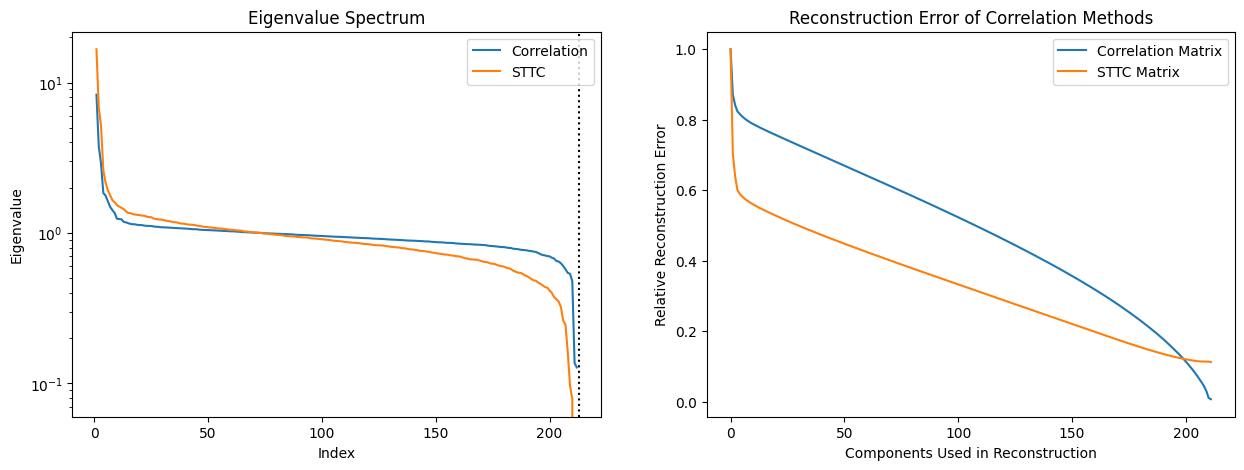

In [10]:
spike_data.plot_eigen_reconstrution( sd )

In [21]:
import numpy as np                                                    # Packages for data analysis
import matplotlib.pyplot as plt
from human_hip.spike_data.analysis import correlation_matrix, eigenvalues_eigenvectors #firing_rates,

    
def reconstruct(W, U, rank):
    Wd = np.diag(W[:rank])
    Ur = U[:, :rank]
    return Ur @ Wd @ Ur.T


def reconstruction_errors(A, W, U):
    norm = np.linalg.norm(A)
    return np.array([
        np.linalg.norm( reconstruct(W, U, rank) - A) / norm
        for rank in range(len(A))])


def plot_eigen_reconstrution( sd ):
    corr_matrix = correlation_matrix(sd)
    sttc_matrix = sd.spike_time_tilings()
    corr_eigenvalues, corr_eigenvectors = eigenvalues_eigenvectors(corr_matrix)
    sttc_eigenvalues, sttc_eigenvectors = eigenvalues_eigenvectors(sttc_matrix)
    
    fig, plot = plt.subplot_mosaic("AB", figsize=(15,5))     
    # Eigenvalue spectrum ---------------------------------------------------------
    index = 1 + np.arange(len(corr_eigenvalues))
    plot["A"].semilogy(index, corr_eigenvalues, label='Correlation')
    plot["A"].plot(index, sttc_eigenvalues, label='STTC')
    plot["A"].set_title('Eigenvalue Spectrum')
    plot["A"].set_xlabel('Index')
    plot["A"].set_ylabel('Eigenvalue')
    plot["A"].set_xlim(0, 20)
    plot["A"].set_ylim(1, 20)
    plot["A"].axvline(len(corr_eigenvalues)+1, ls=':', c='k')
    plot["A"].legend(loc="upper right");
    
    # Reconstruction Error --------------------------------------------------------
    errs_corr = reconstruction_errors(corr_matrix, corr_eigenvalues, corr_eigenvectors )      # Correlation
    errs_sttc = reconstruction_errors(sttc_matrix, sttc_eigenvalues, sttc_eigenvectors )     # STTC   
    
    plot["B"].plot(errs_corr, label='Correlation Matrix')          # Correlation
    plot["B"].plot(errs_sttc, label='STTC Matrix')                 # STTC
    
    plot["B"].set_title("Reconstruction Error of Correlation Methods")
    plot["B"].set_xlabel('Components Used in Reconstruction')
    plot["B"].set_ylabel('Relative Reconstruction Error')
    plot["B"].set_xlim(0, 20)
    plot["B"].set_ylim(.5, 1)
    plot["B"].legend(loc="upper right");
    fig.show()


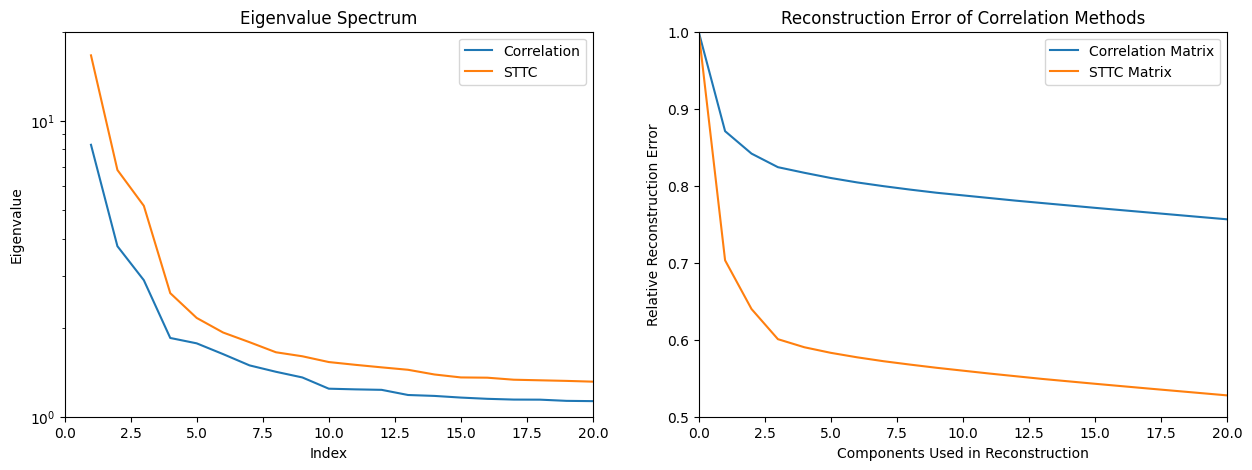

In [22]:
plot_eigen_reconstrution( sd )

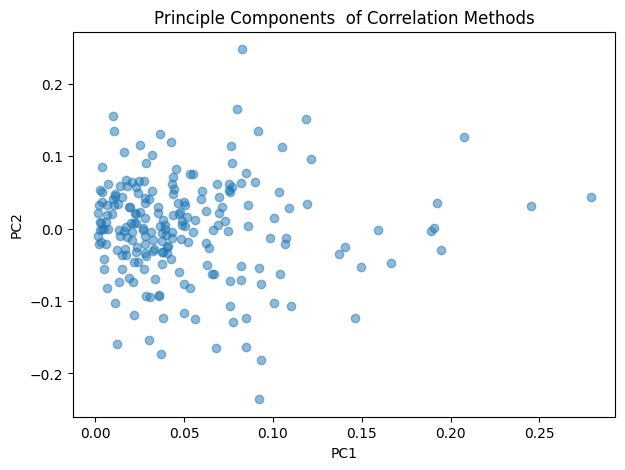

In [6]:
spike_data.plot_pca( sd, sttc=False )

# Chip 21769

In [14]:
sd = spike_data.read_autocurated_data( "/workspaces/human_hippocampus/data/ephys/2023-12-11-e-Hc120523_aav9hckcr1_chip21769/derived/kilosort2/Hc120523_aav9hckcr1_chip21769_121123_2_acqm.zip" )


(-1.0, 60.0)

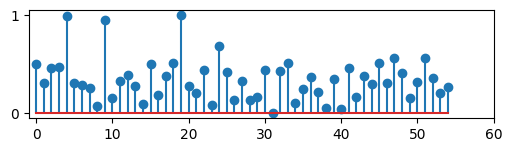

In [15]:

sttc_matrix = sd.spike_time_tilings()
sttc_eigenvalues, sttc_eigenvectors = eigenvalues_eigenvectors(sttc_matrix)
x = sttc_eigenvectors[:,0]
x_normalized = (x - np.min(x)) / (np.max(x) - np.min(x))

plt.figure(figsize=(6,1.4)) 
plt.stem( x_normalized )
plt.yticks([0, 1])
plt.xlim(-1, 60)

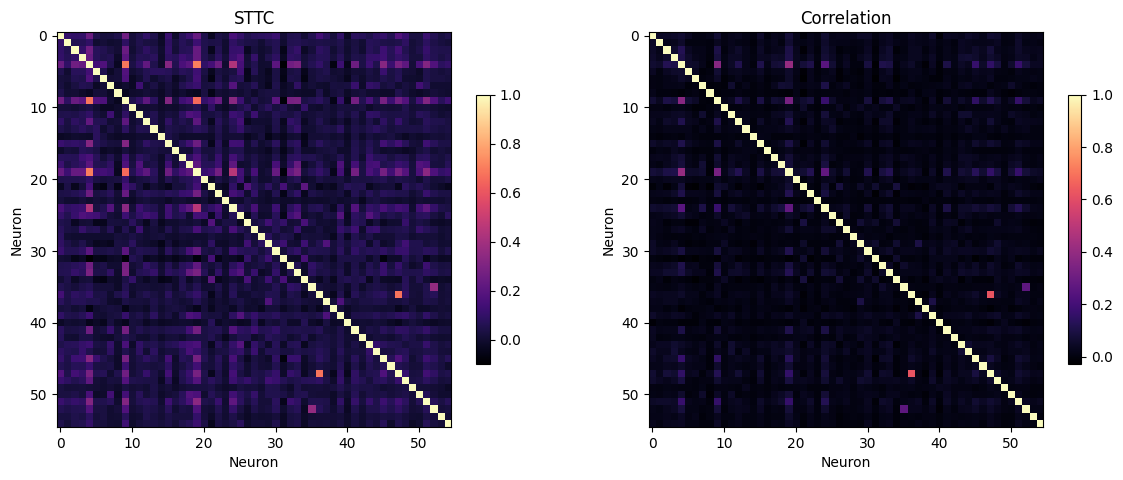

In [16]:
spike_data.plot_matrices_connectivity( sd )

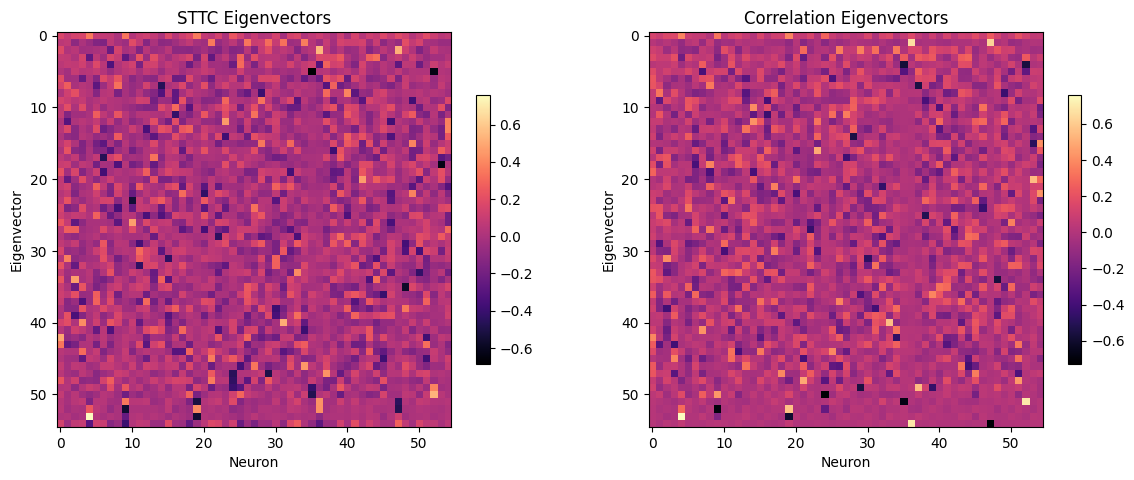

In [17]:
spike_data.plot_eigenvector_matrix(sd )

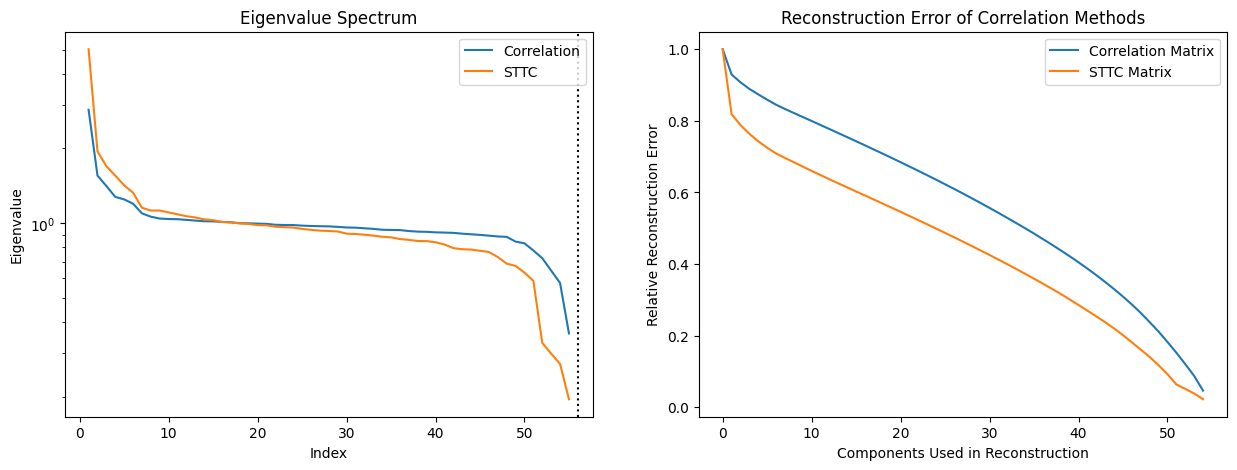

In [18]:
spike_data.plot_eigen_reconstrution( sd )

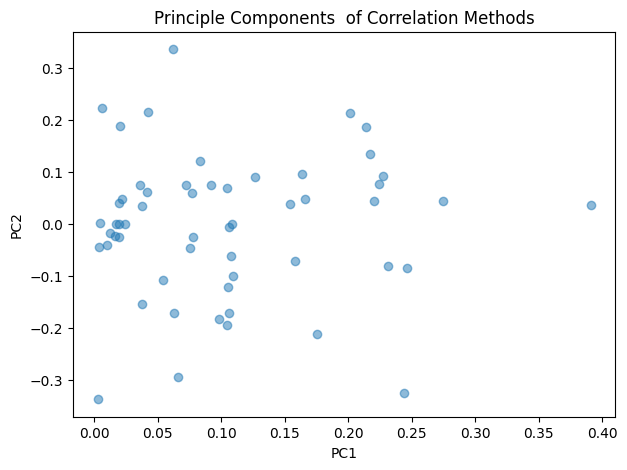

In [19]:
spike_data.plot_pca( sd, sttc=False )